# Deep EDA & Prediction using Linear Regression · Supply Chain Analysis

Importing required Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [82]:
df=pd.read_csv('supply_chain_data.csv')
df.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [83]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [84]:
df.size

2400

In [85]:
print("---------->Data Set Information<----------------\n")
df.info()

---------->Data Set Information<----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 no

In [86]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


Finding for any Null values

In [87]:
df.isna().sum()


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

Exploratory Data Analysis

Product type
cosmetics    26
haircare     34
skincare     40
Name: Product type, dtype: int64


<Axes: ylabel='Product type'>

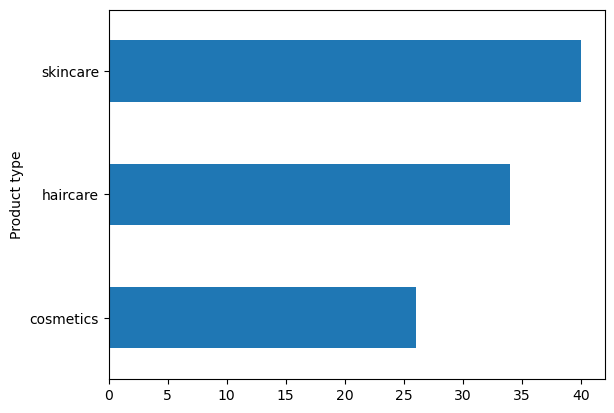

In [88]:
print(df.groupby(['Product type'])['Product type'].count())
df.groupby(['Product type'])['Product type'].count().plot(kind='barh')

<Axes: xlabel='Location', ylabel='Price'>

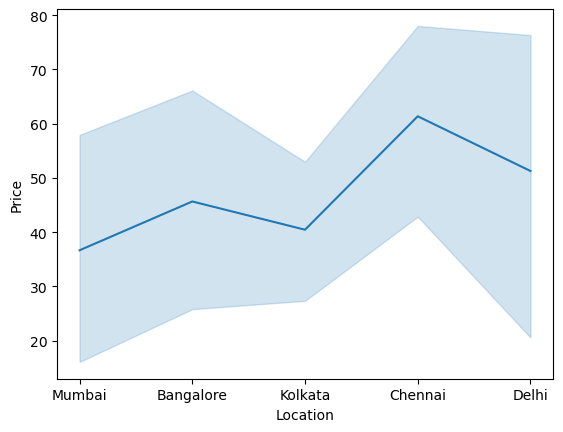

In [89]:
df_haircare=df[df['Product type']=='haircare']
sns.lineplot(data=df_haircare,x='Location',y='Price')

<Axes: xlabel='Location', ylabel='Price'>

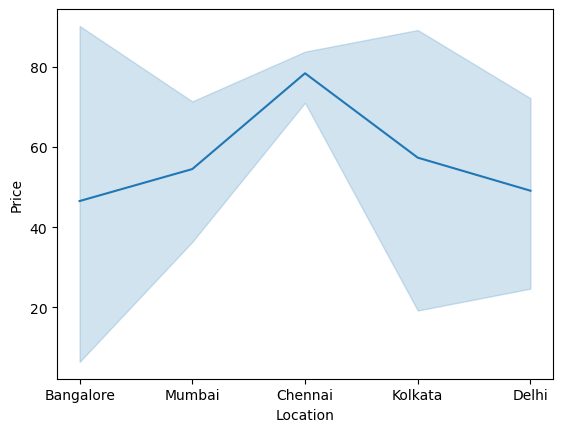

In [90]:
df_cosmetics=df[df['Product type']=='cosmetics']
sns.lineplot(data=df_cosmetics,x='Location',y='Price')

<Axes: xlabel='Location', ylabel='Price'>

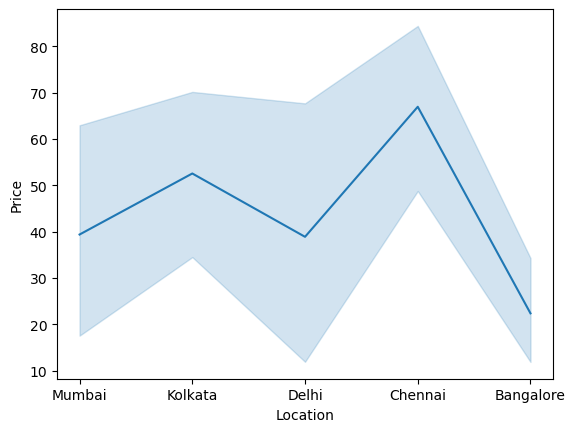

In [91]:
df_skincare=df[df['Product type']=='skincare']
sns.lineplot(data=df_skincare,x='Location',y='Price')

Observation: In all the regions "chennai" leads in the price 

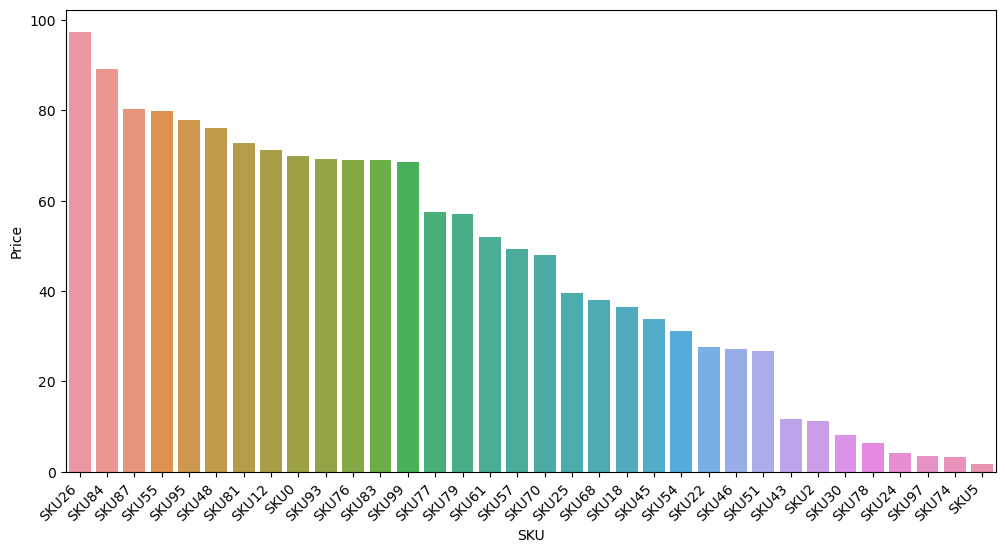

In [92]:
df_haircare = df[df['Product type']=='haircare'].sort_values(by=['Price'], ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_haircare, x='SKU', y='Price', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

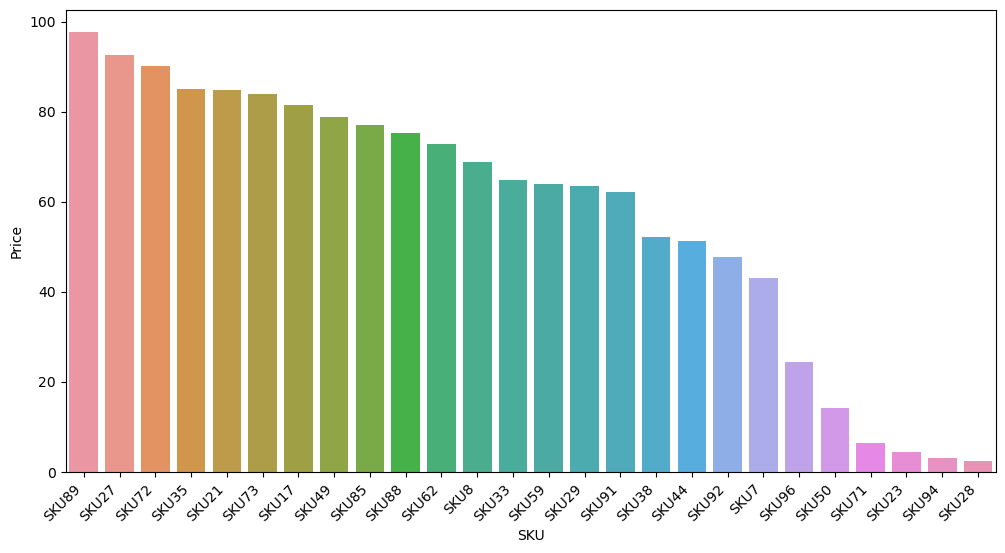

In [93]:
df_cosmetics = df[df['Product type']=='cosmetics'].sort_values(by=['Price'], ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_cosmetics, x='SKU', y='Price', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

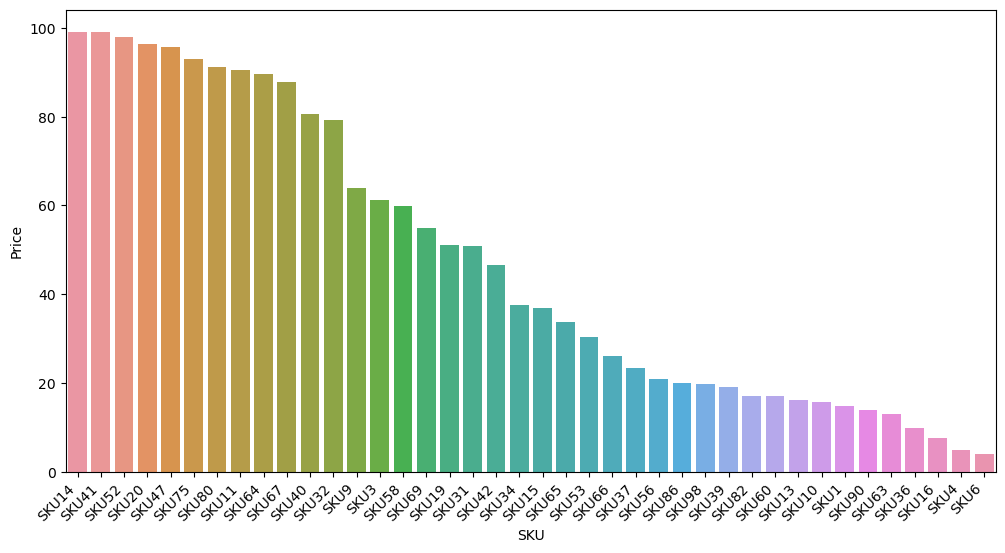

In [94]:
df_skincare = df[df['Product type']=='skincare'].sort_values(by=['Price'], ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_skincare, x='SKU', y='Price', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

<Axes: xlabel='Price', ylabel='Product type'>

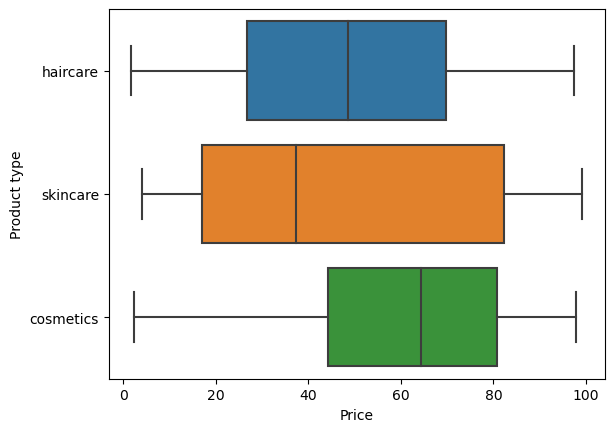

In [95]:
sns.boxplot(data=df, x="Price", y="Product type")

observation-

- haircare products min and max price range from ~25 to ~65 while median residing at ~48 for all locations
- skincare products min and max price range from ~18 to ~83 while median residing at ~38 for all locations
- cosmetics products min and max price range from ~45 to ~80 while median residing at ~65 for all locations

In [96]:
cols = ['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 
        'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 
        'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 
        'Supplier name', 'Location', 'Lead time', 'Production volumes', 
        'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 
        'Defect rates', 'Transportation modes', 'Routes', 'Costs']

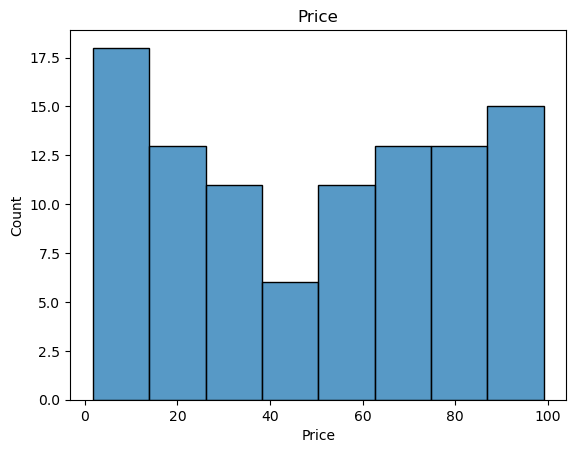

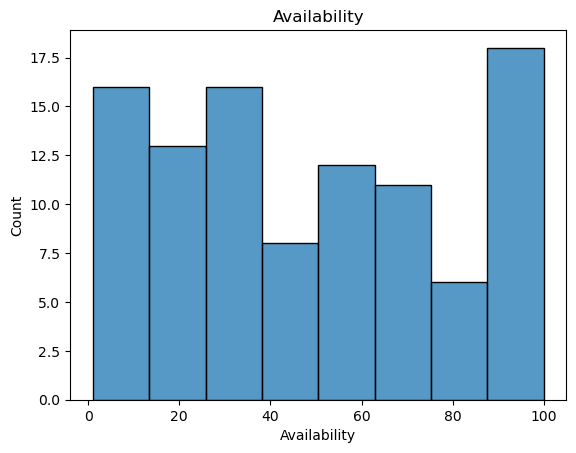

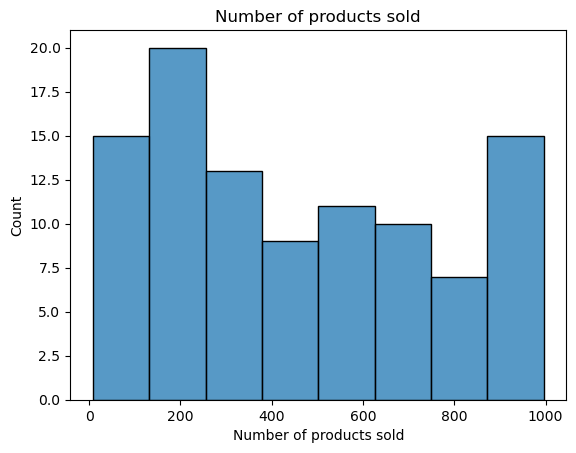

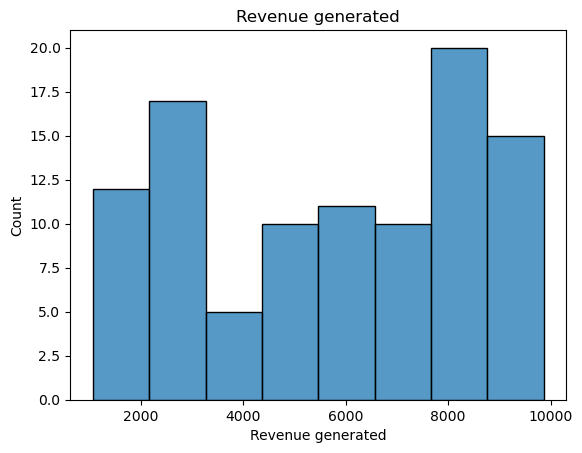

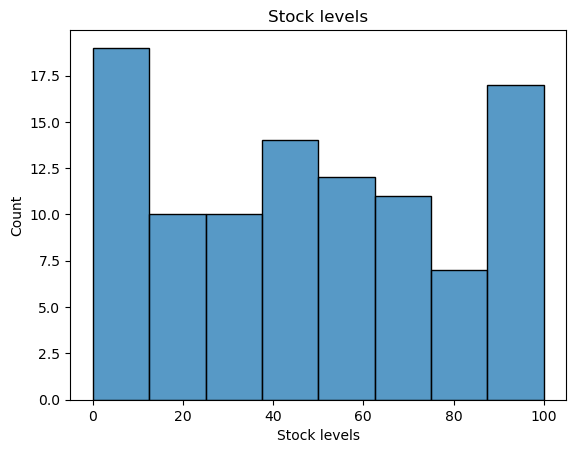

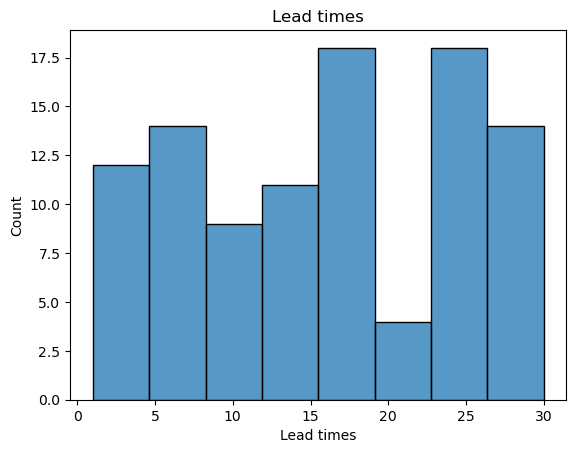

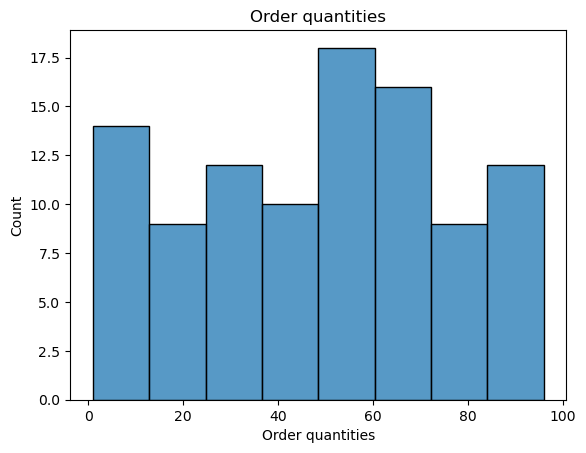

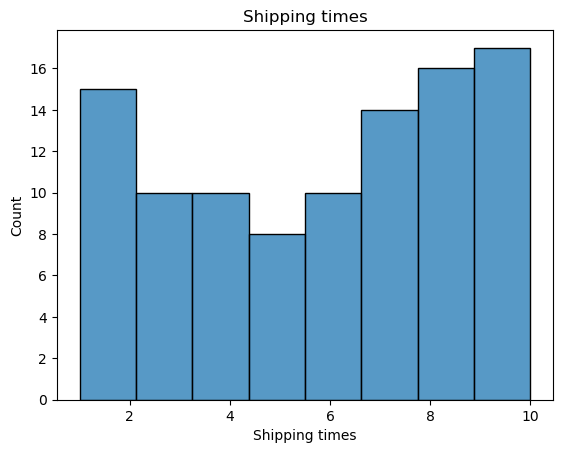

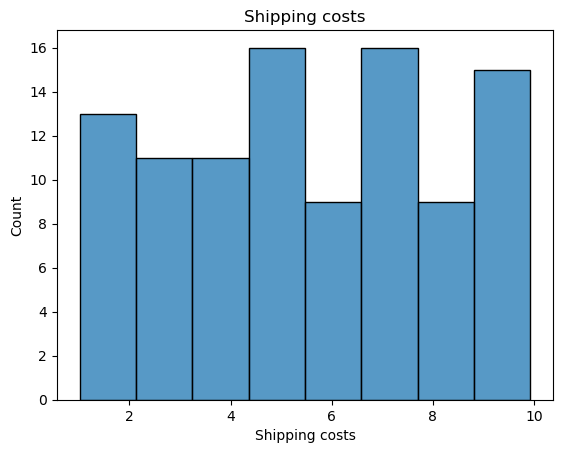

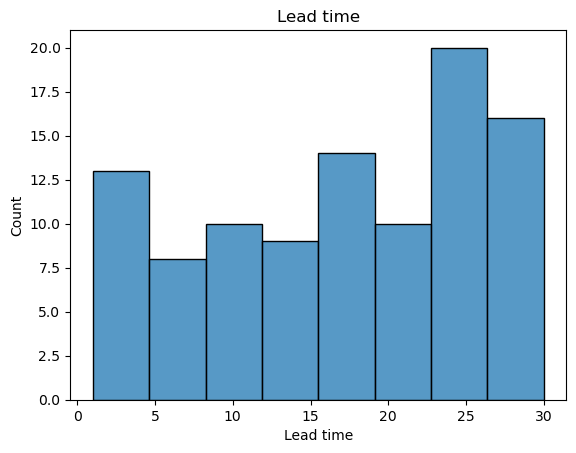

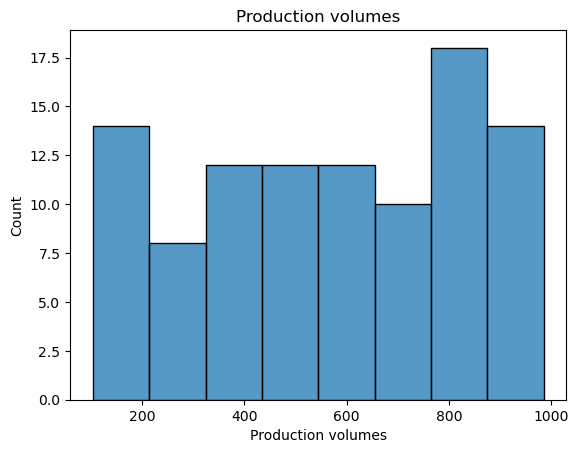

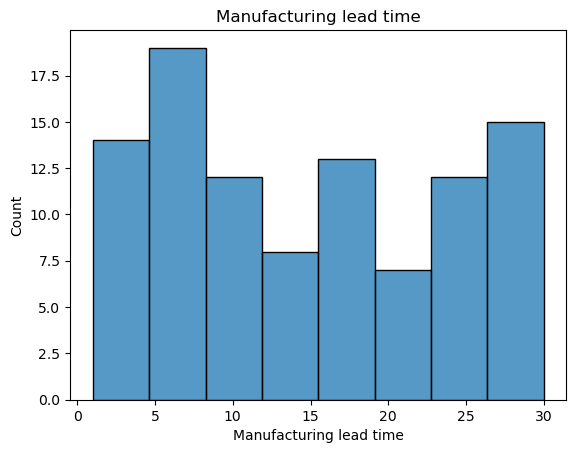

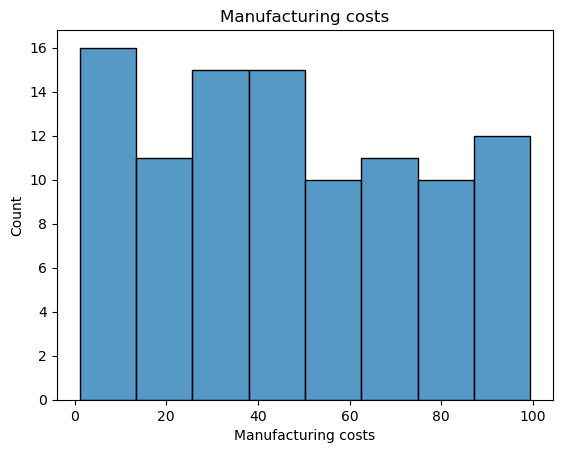

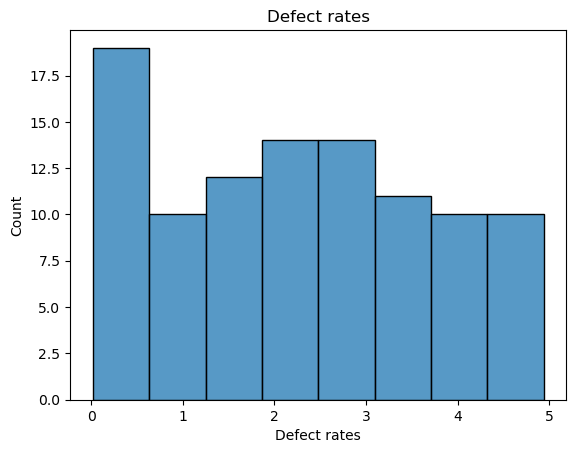

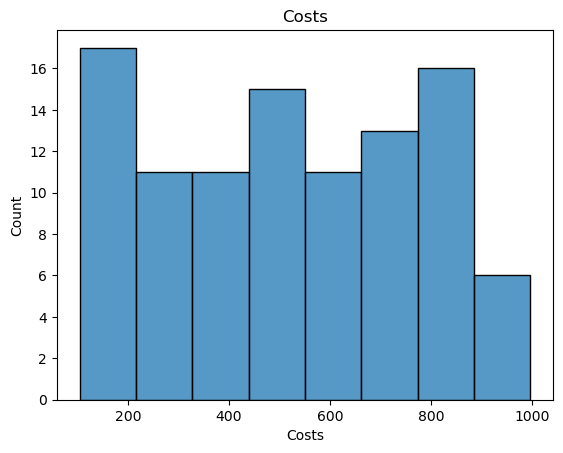

In [97]:
for col in cols:
    if df[col].dtype != 'object':  # Ignore non-numeric columns
        sns.histplot(df[col], kde=False)
        plt.title(col)
        plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\2334157102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[cols].corr()


<Figure size 1800x1800 with 0 Axes>

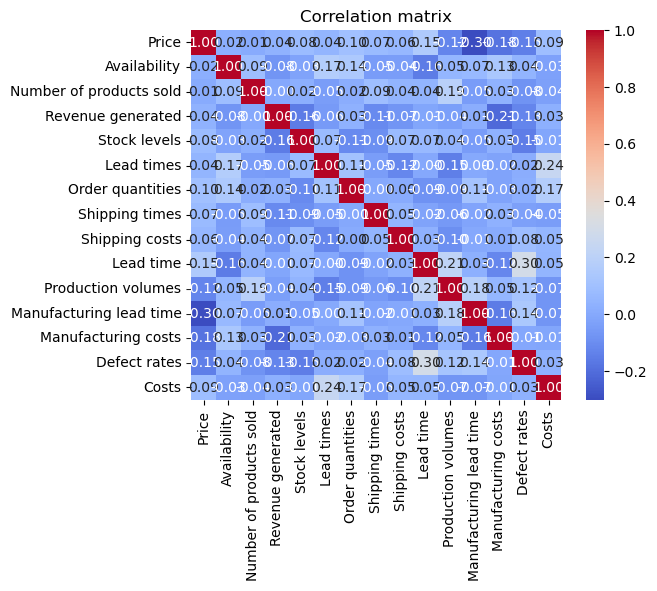

<Figure size 1800x1800 with 0 Axes>

In [98]:
# Calculate correlation matrix and plot heatmap
corr = df[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation matrix')
plt.figure(figsize=(18,18))

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


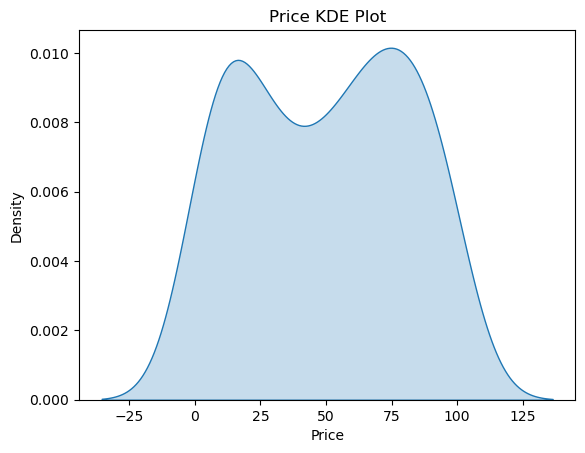

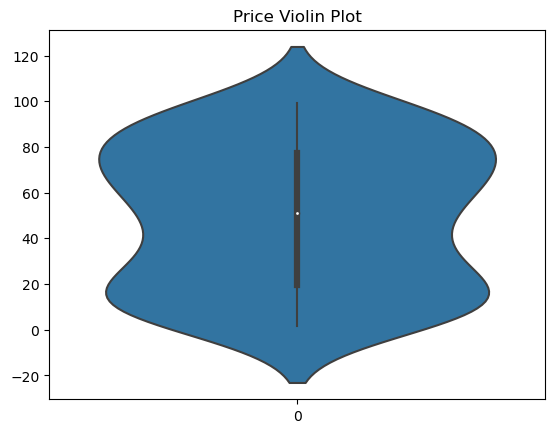

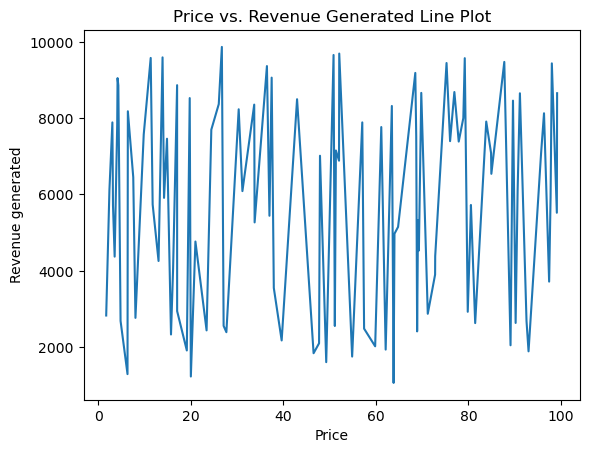

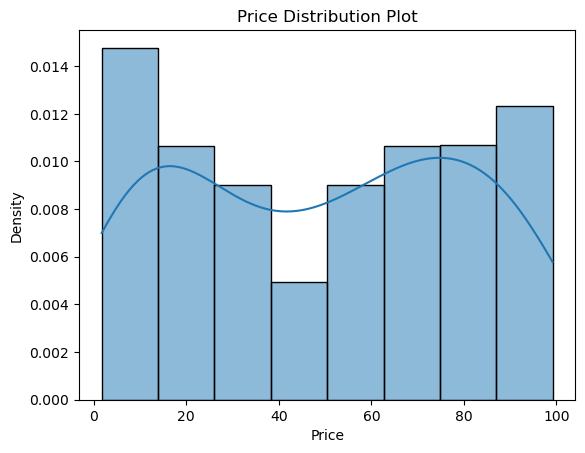

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


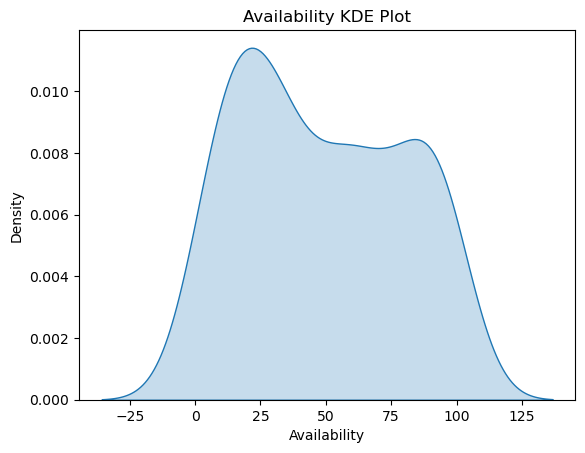

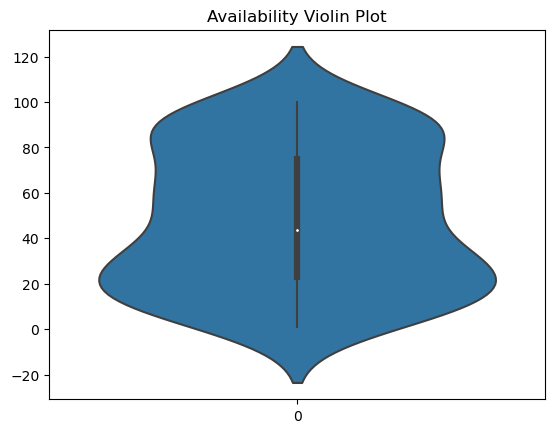

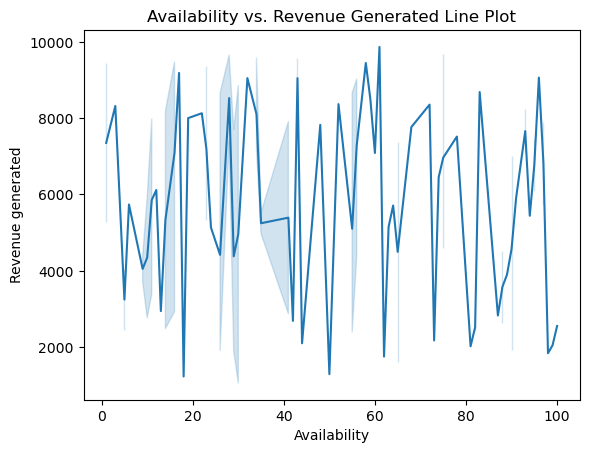

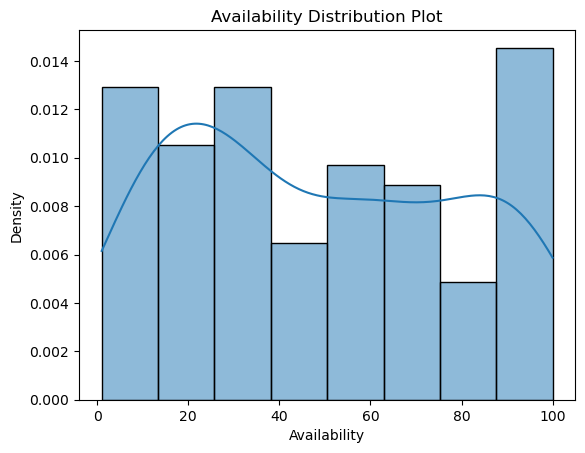

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


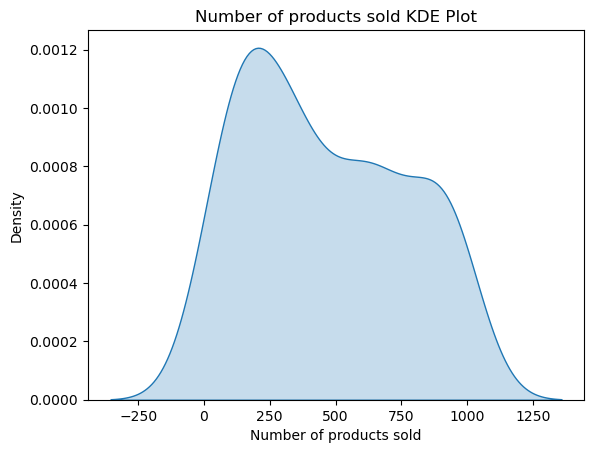

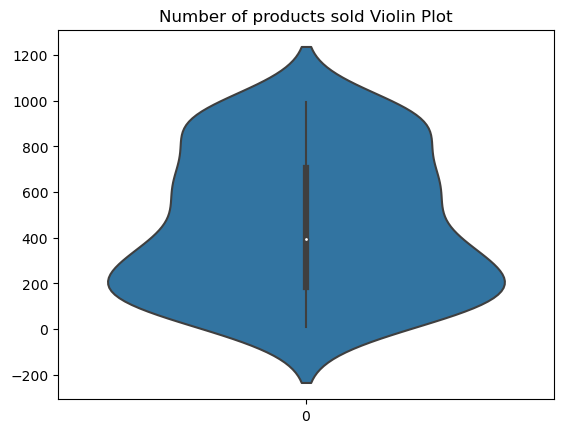

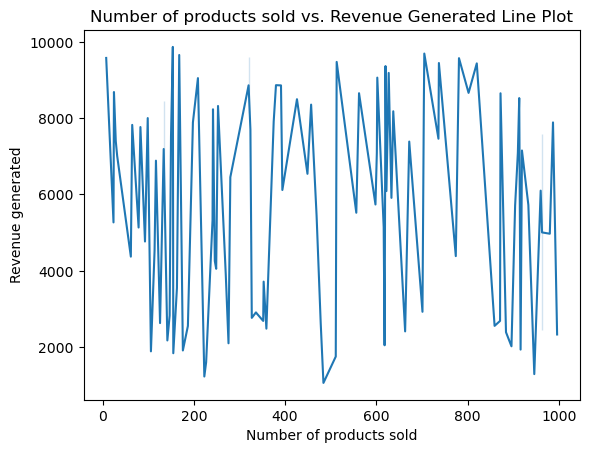

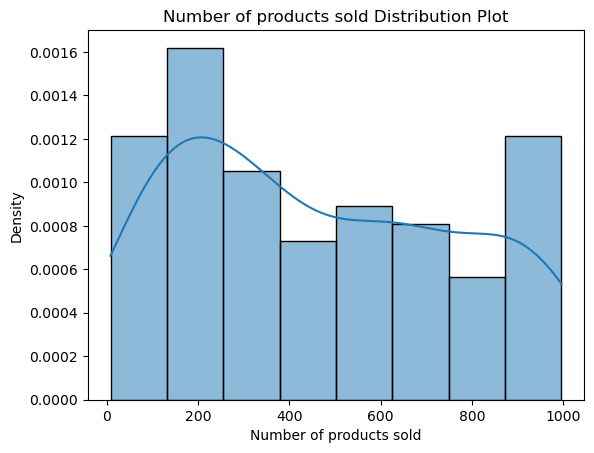

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


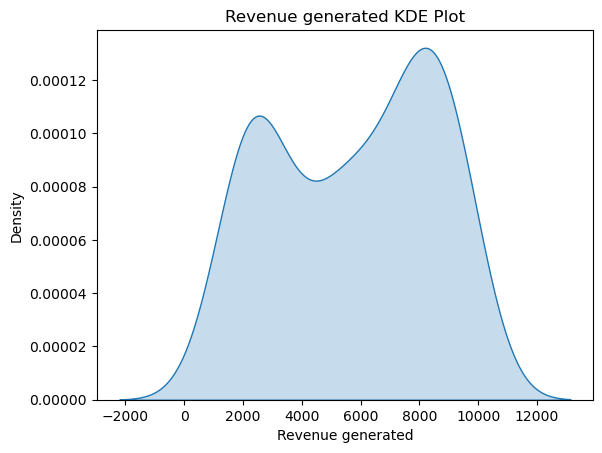

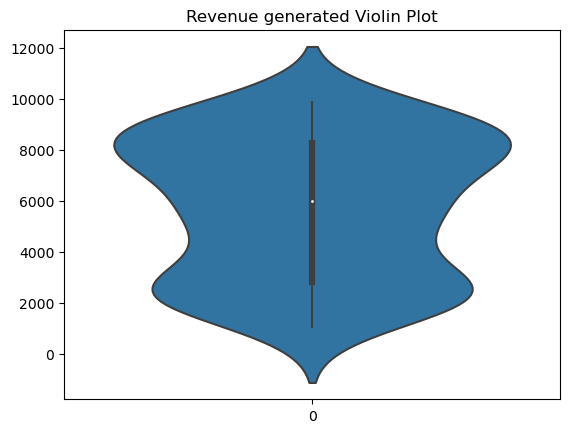

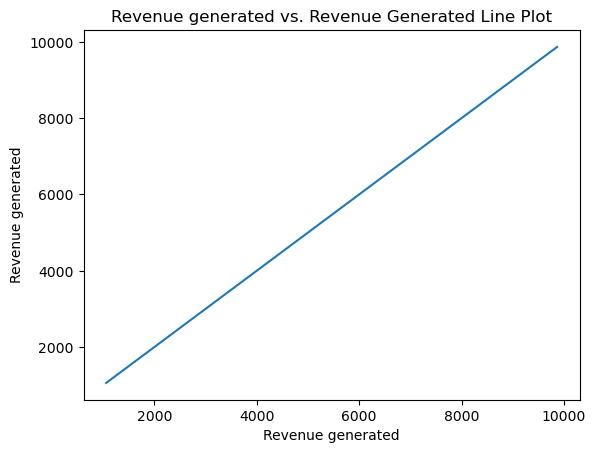

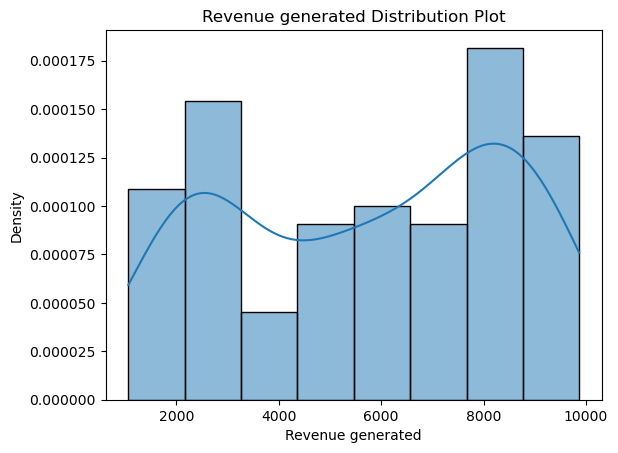

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


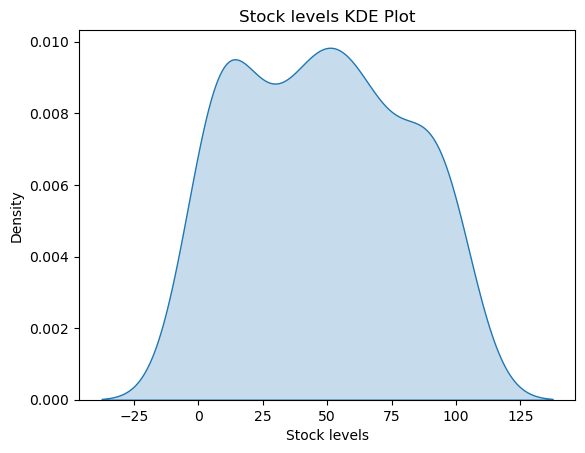

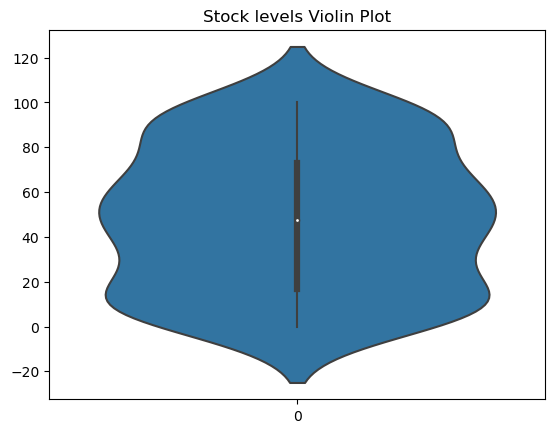

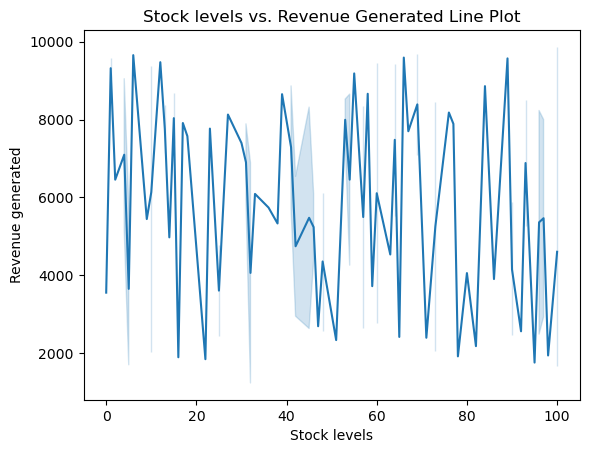

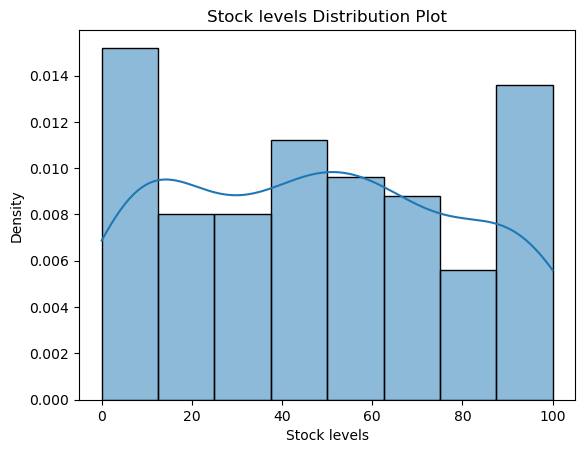

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


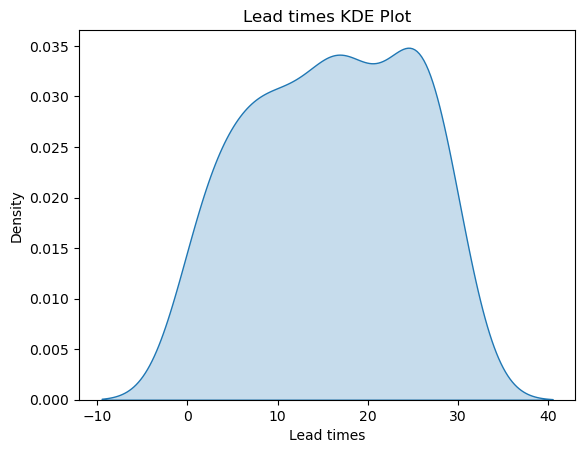

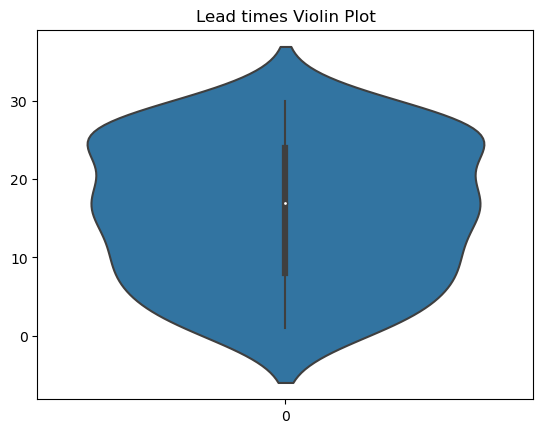

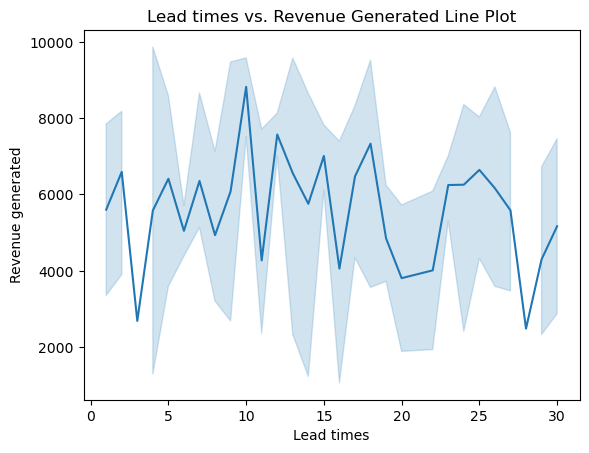

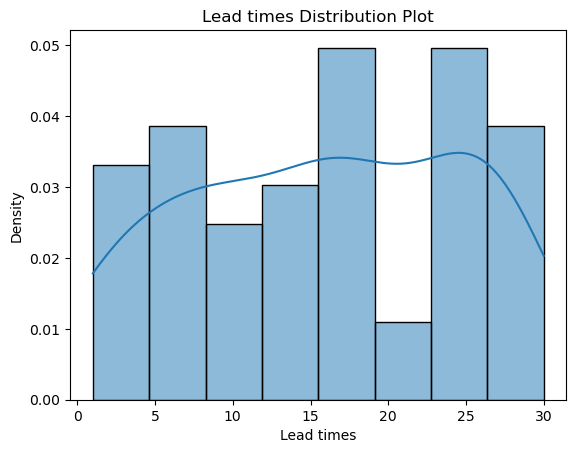

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


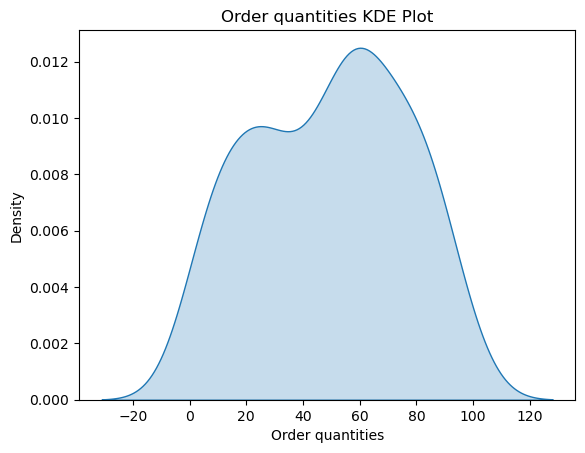

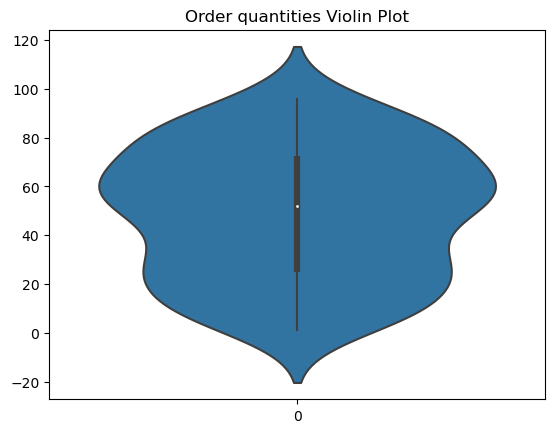

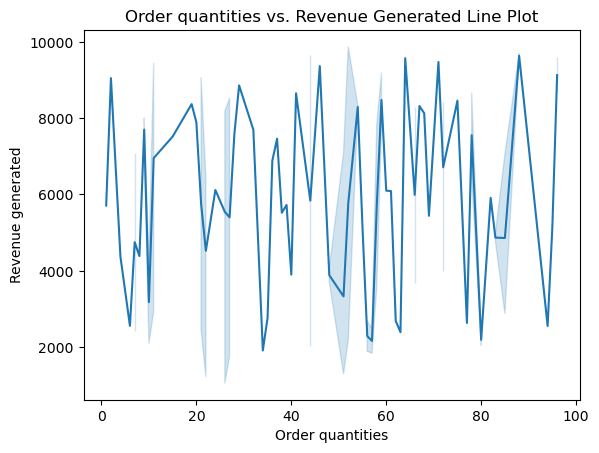

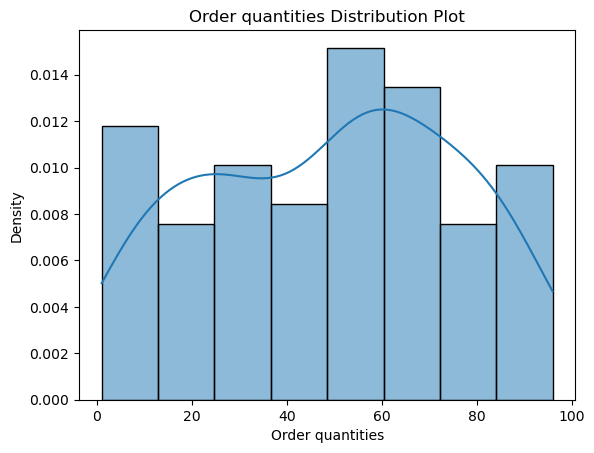

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


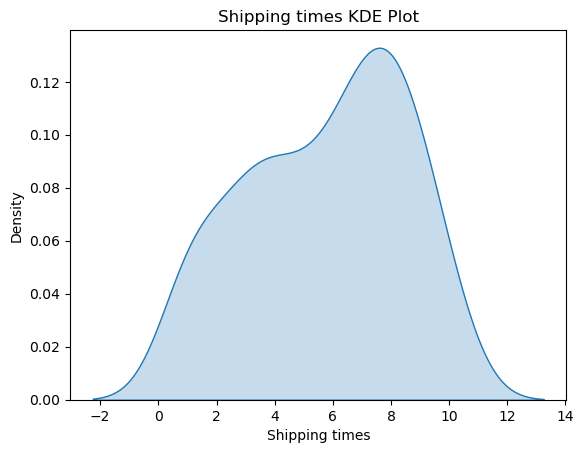

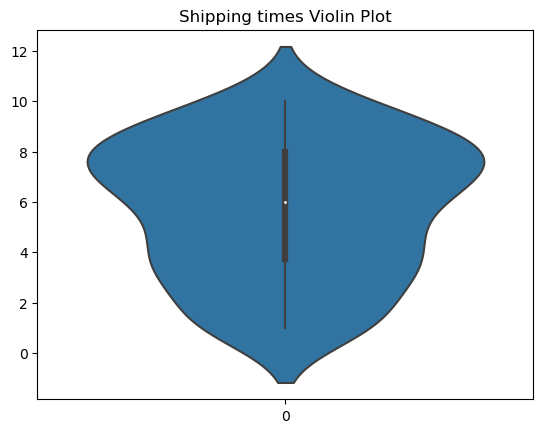

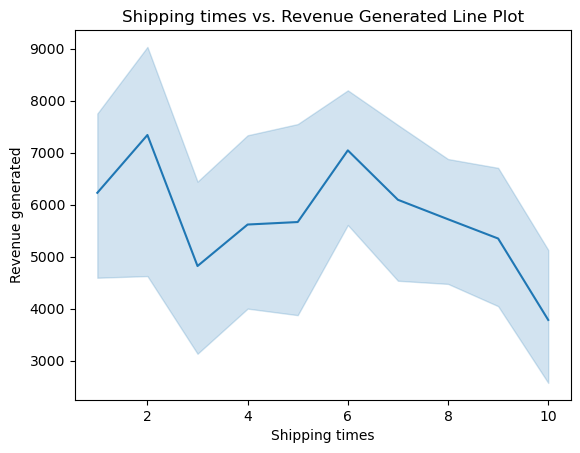

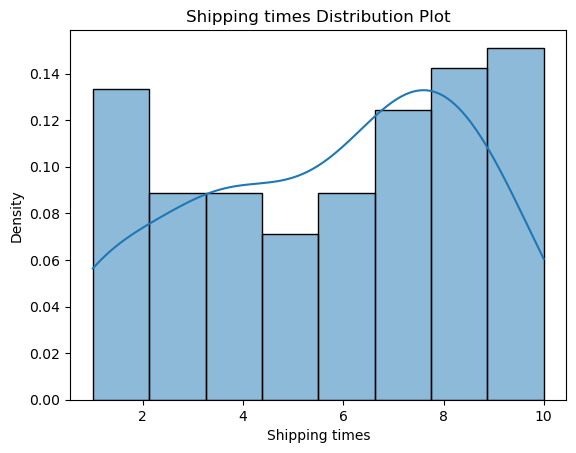

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


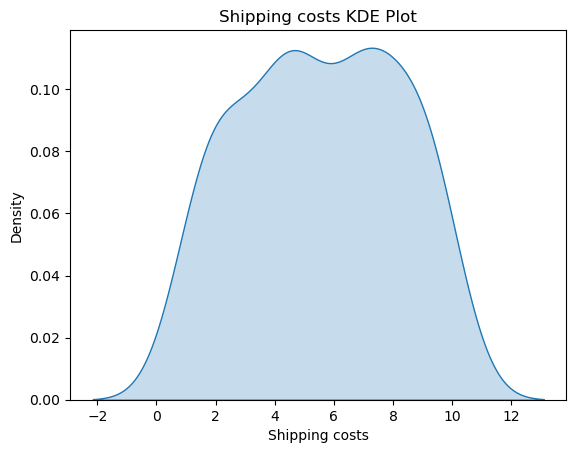

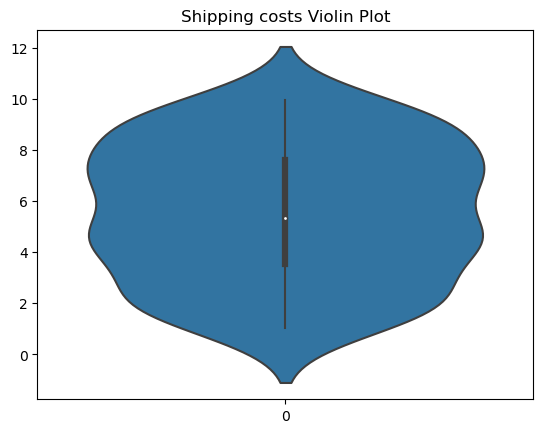

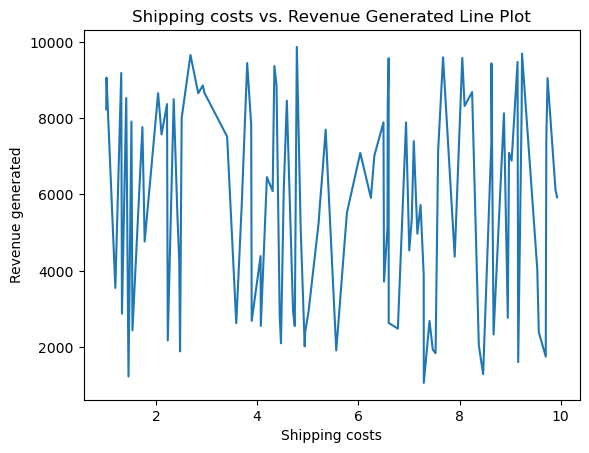

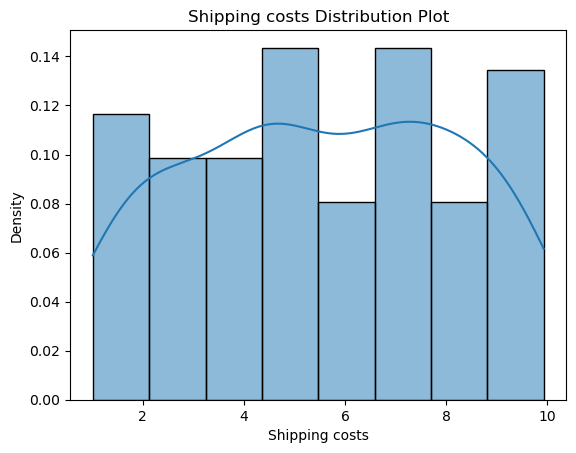

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


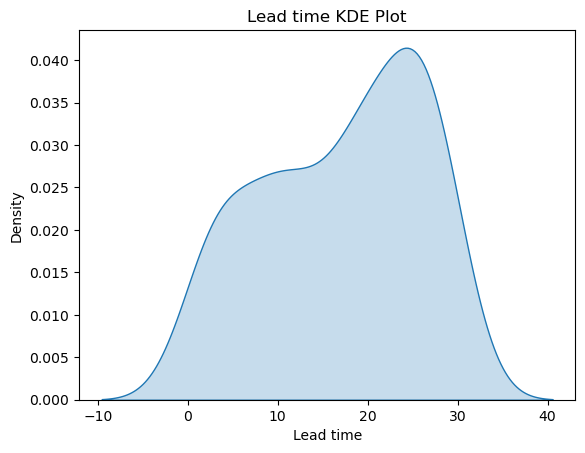

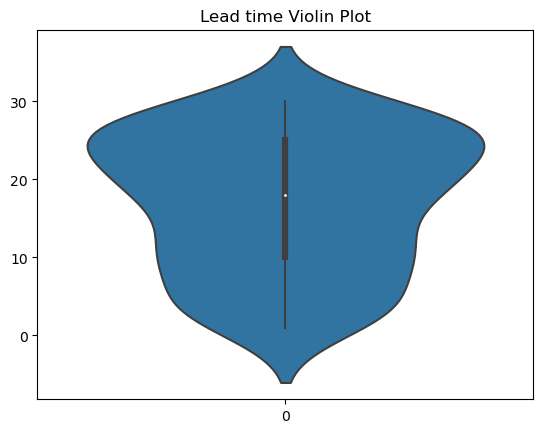

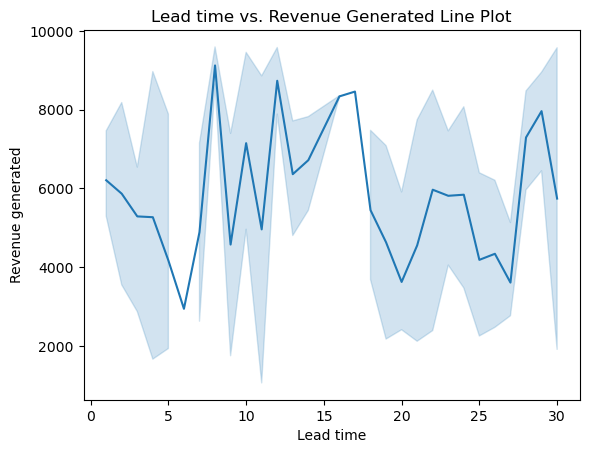

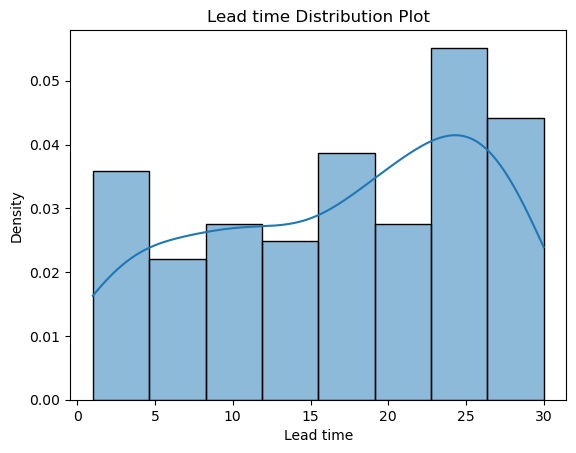

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


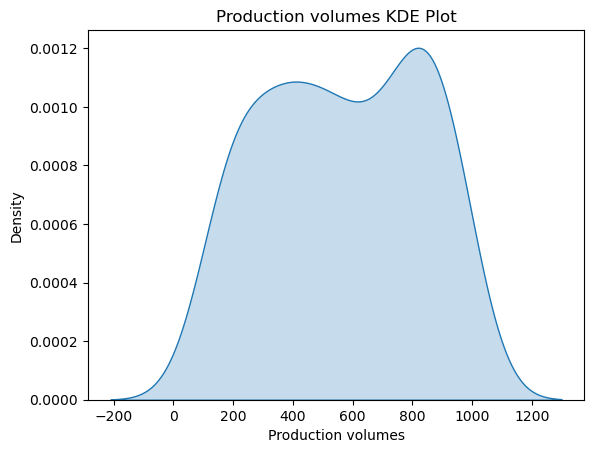

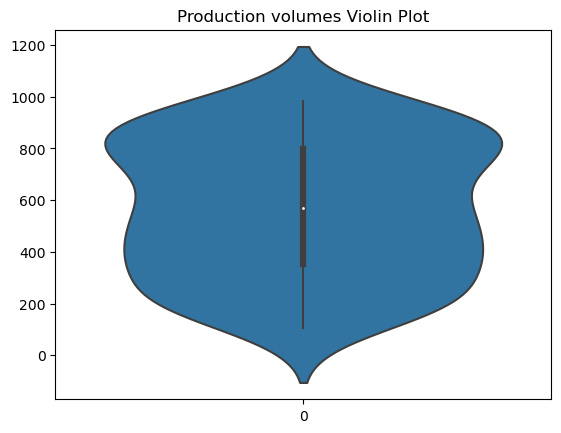

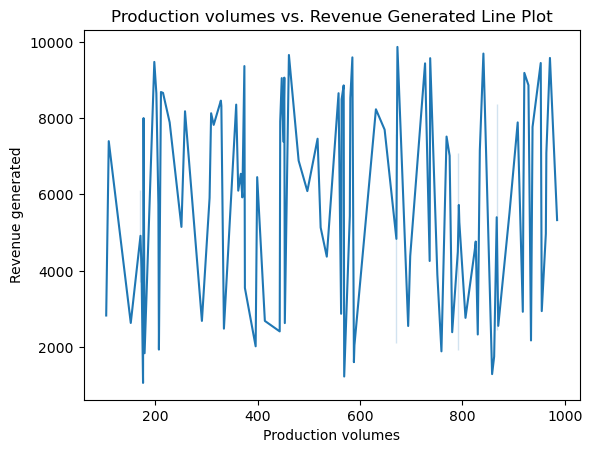

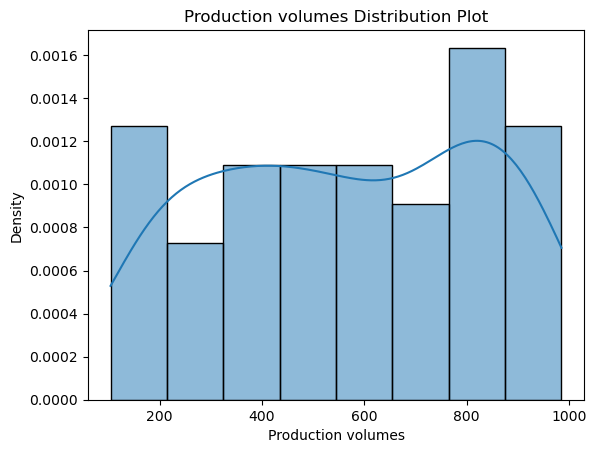

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


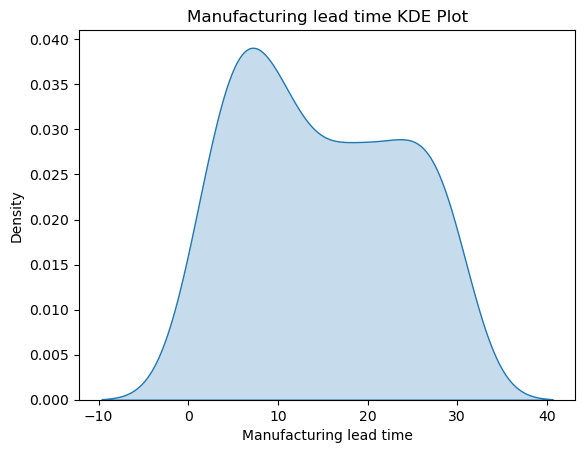

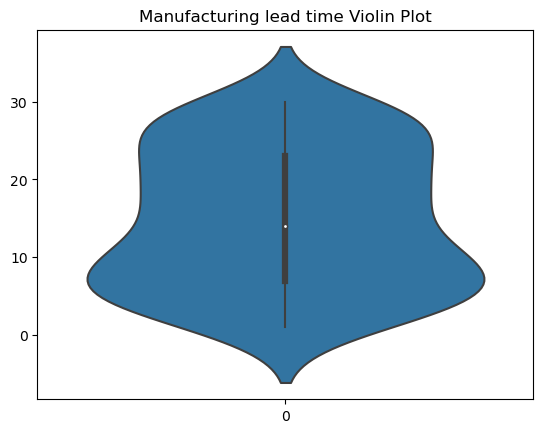

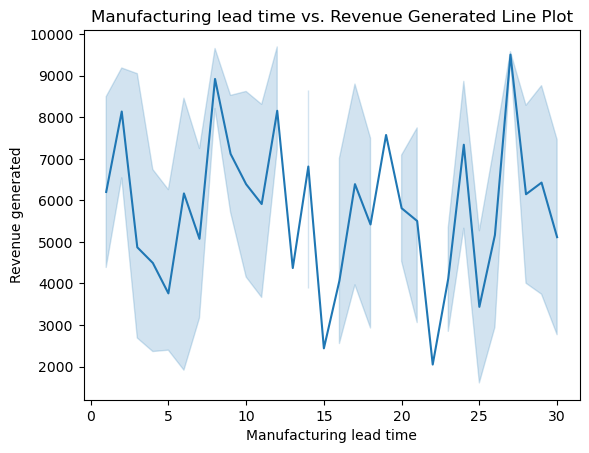

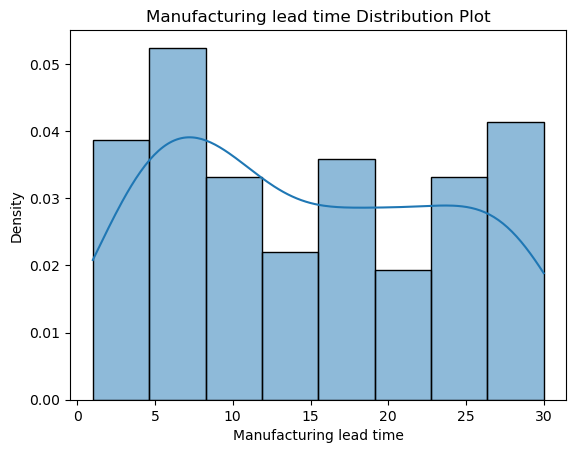

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


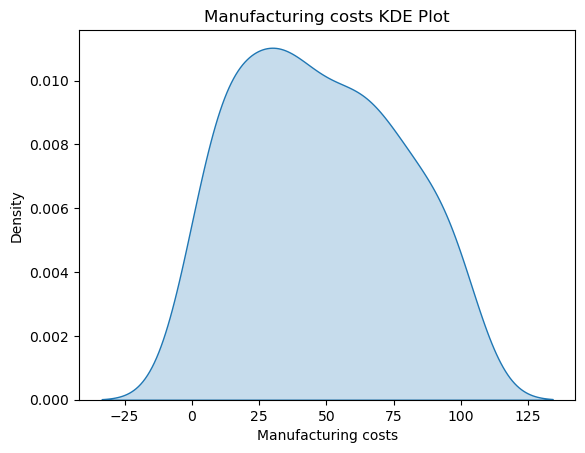

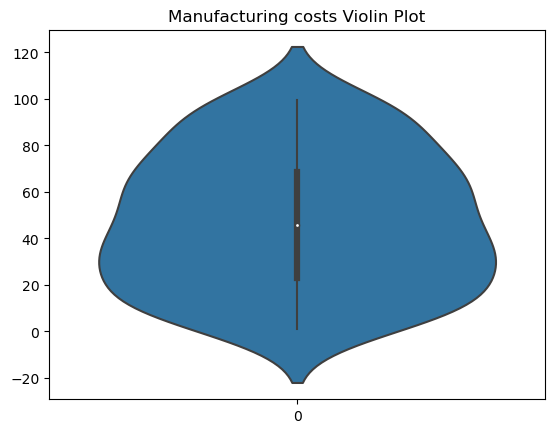

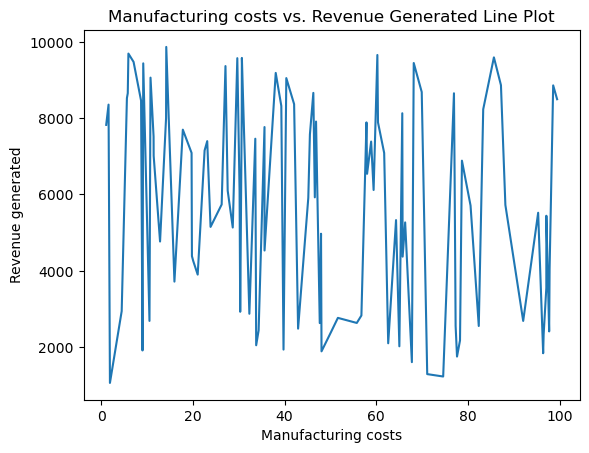

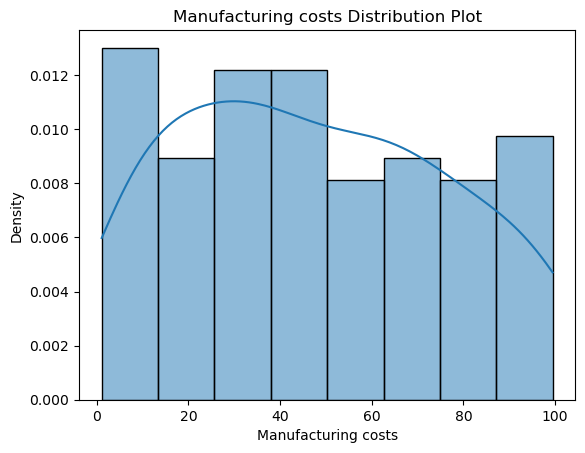

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


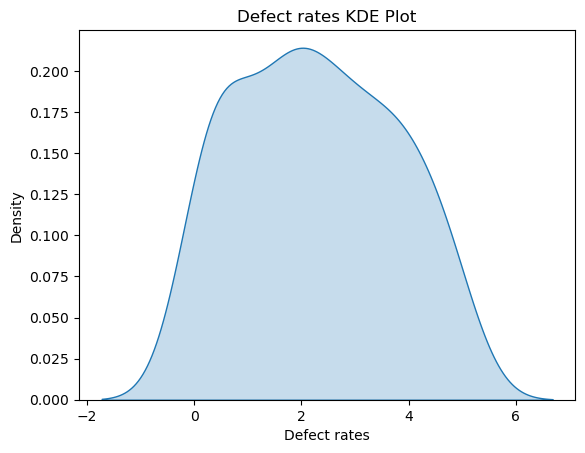

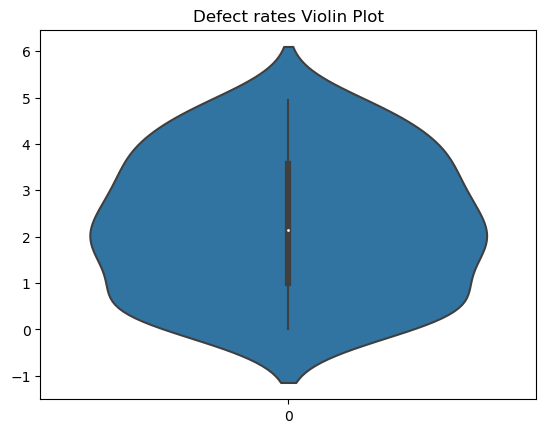

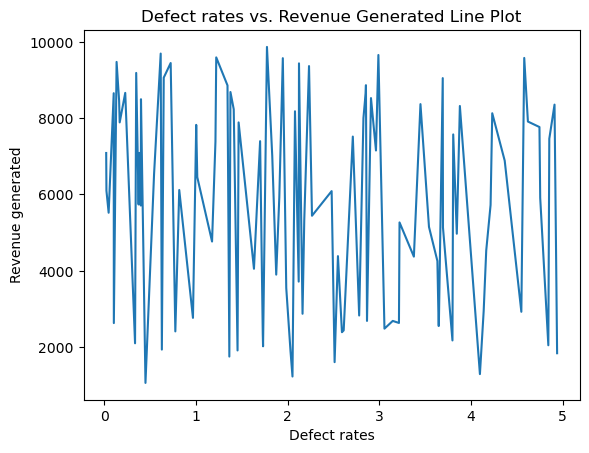

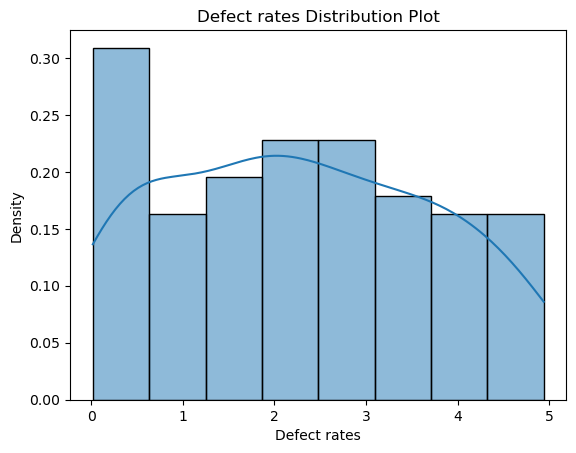

C:\Users\Admin\AppData\Local\Temp\ipykernel_46088\1704542100.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


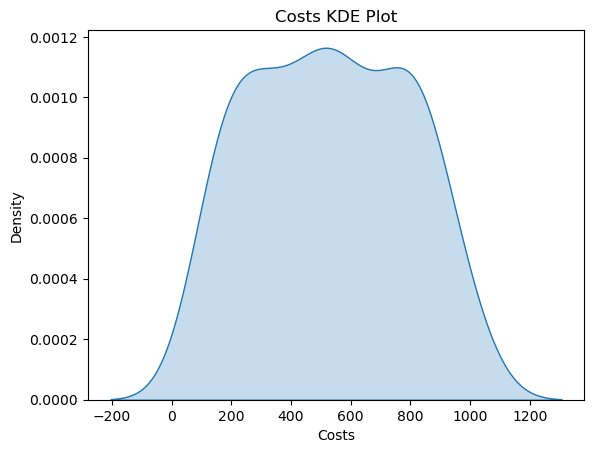

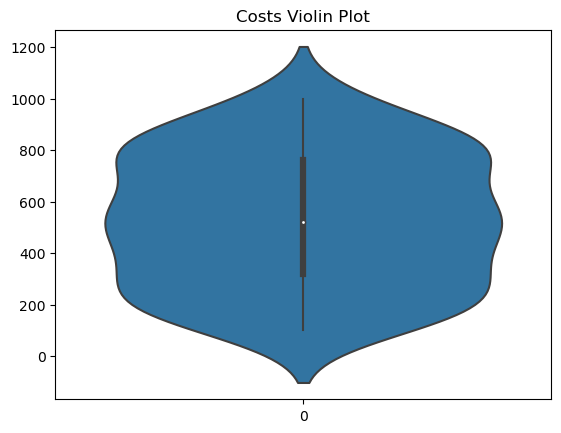

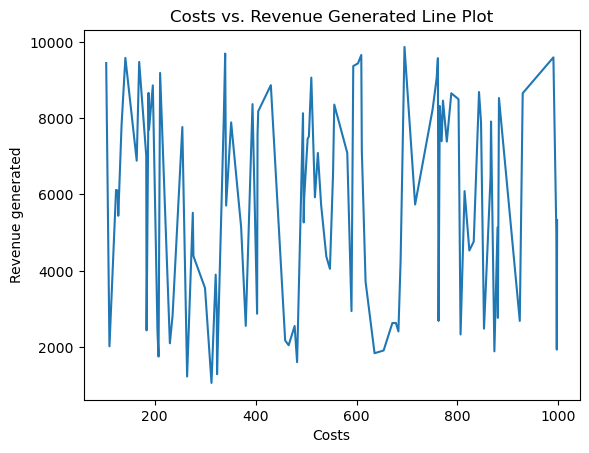

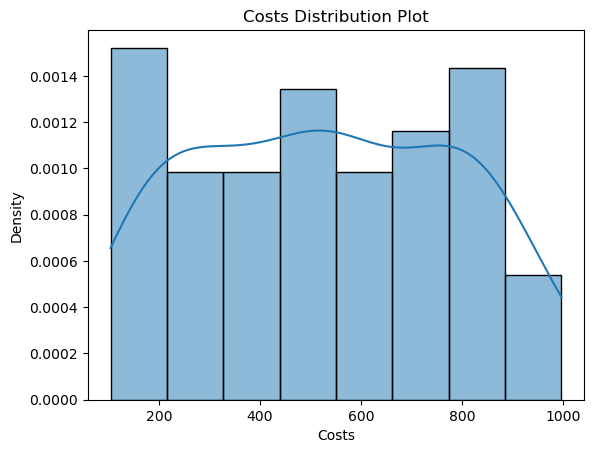

In [99]:
# Plot univariate distributions of selected variables
for col in cols:
    if df[col].dtype != 'object':  # Ignore non-numeric columns
        # KDE plot
        sns.kdeplot(df[col], shade=True)
        plt.title(f"{col} KDE Plot")
        plt.show()

        # Violin plot
        sns.violinplot(df[col])
        plt.title(f"{col} Violin Plot")
        plt.show()

        # Line plot
        sns.lineplot(data=df, x=col, y='Revenue generated')
        plt.title(f"{col} vs. Revenue Generated Line Plot")
        plt.show()

        # Distribution plot
        sns.histplot(df[col], kde=True, stat='density')
        plt.title(f"{col} Distribution Plot")
        plt.show()

In [100]:
le = LabelEncoder()
df['Product type'] = le.fit_transform(df['Product type'])
df['Customer demographics'] = le.fit_transform(df['Customer demographics'])
df['Shipping carriers'] = le.fit_transform(df['Shipping carriers'])
df['Supplier name'] = le.fit_transform(df['Supplier name'])
df['Location'] = le.fit_transform(df['Location'])
df['Inspection results'] = le.fit_transform(df['Inspection results'])
df['Transportation modes'] = le.fit_transform(df['Transportation modes'])
df['Routes'] = le.fit_transform(df['Routes'])

In [101]:
df['Availability'] = df['Availability'].astype(int)
df['Number of products sold'] = df['Number of products sold'].astype(int)
df['Stock levels'] = df['Stock levels'].astype(int)
df['Lead times'] = df['Lead times'].astype(int)
df['Order quantities'] = df['Order quantities'].astype(int)
df['Shipping times'] = df['Shipping times'].astype(int)
df['Lead time'] = df['Lead time'].astype(int)
df['Production volumes'] = df['Production volumes'].astype(int)
df['Manufacturing lead time'] = df['Manufacturing lead time'].astype(int)
df['Defect rates'] = df['Defect rates'].astype(float)

In [102]:
df['Price'] = df['Price'].astype(float)
df['Revenue generated'] = df['Revenue generated'].astype(float)
df['Shipping costs'] = df['Shipping costs'].astype(float)
df['Manufacturing costs'] = df['Manufacturing costs'].astype(float)
df['Costs'] = df['Costs'].astype(float)

In [103]:
X = df[['Price', 'Availability', 'Number of products sold', 'Customer demographics',
        'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
        'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time',
        'Manufacturing costs', 'Inspection results', 'Defect rates', 'Costs']]
y = df['Revenue generated']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluating the model on the testing set
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2}")

R^2 score: -0.549159780866026


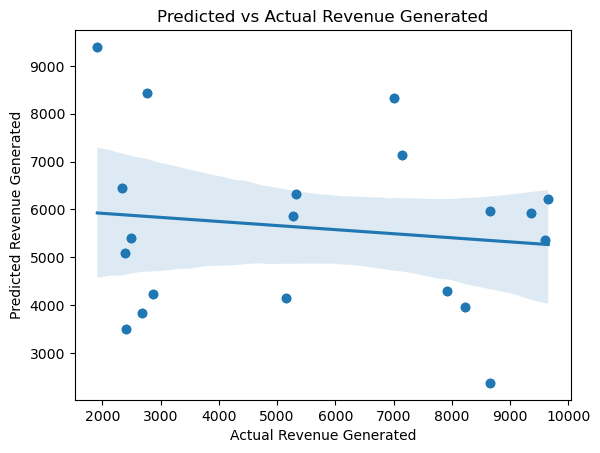

In [104]:
# Creating a scatter plot with the actual revenue generated values on the x-axis and the predicted revenue generated values on the y-axis
plt.scatter(y_test, y_pred)

# Plotting a regression line to see how well the model has fit the data
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Revenue Generated')
plt.ylabel('Predicted Revenue Generated')
plt.title('Predicted vs Actual Revenue Generated')
plt.show()